## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [ ]:
corpus = open('lenta.txt', encoding="utf-8").read()

import nltk
from collections import Counter
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import math

#СПОСОБ НОМЕР 1

sentences = sent_tokenize(corpus, language='russian') #токенизируем текст по предложениям

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences] #токенизируем предложения по словам

tokenized_sentences = [[token.lower() for token in sentence if not re.match(r'\W+', token)] 
                       for sentence in tokenized_sentences] #опускаем регистр

russian_stopwords = set(stopwords.words("russian")) #сразу вставим стоп-слова

def ngrammer(tokens, n = 2): #пишем функцию нграммера
    ngrams = []
    tokens = [token for token in tokens if token not in russian_stopwords]
    for i in range(len(tokens) - n + 1):
        ngrams.append(' '.join(tokens[i:i + n]))
    return ngrams

pentagram_counts = Counter()
for sentence in tokenized_sentences:
    pentagram_counts.update(ngrammer([token for token in sentence], 5))

pentagram_counts.most_common(20)


[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [5]:
#СПОСОБ НОМЕР 2

sentences = word_tokenize(corpus, "russian", preserve_line=True) #токенизируем текст по предложениям

tokenized_sentences = [[token.lower() for token in sentence if not re.match(r'\W+', token)] 
                       for sentence in tokenized_sentences] #опускаем регистр

russian_stopwords = set(stopwords.words("russian")) #сразу вставим стоп-слова

def ngrammer(tokens, n = 2): #пишем функцию нграммера
    ngrams = []
    tokens = [token for token in tokens if token not in russian_stopwords]
    for i in range(len(tokens) - n + 1):
        ngrams.append(' '.join(tokens[i:i + n]))
    return ngrams

pentagram_counts = Counter()
for sentence in tokenized_sentences:
    pentagram_counts.update(ngrammer([token for token in sentence], 5))

pentagram_counts.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

Как будто бы нет разницы, если я всё правильно сделал!

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

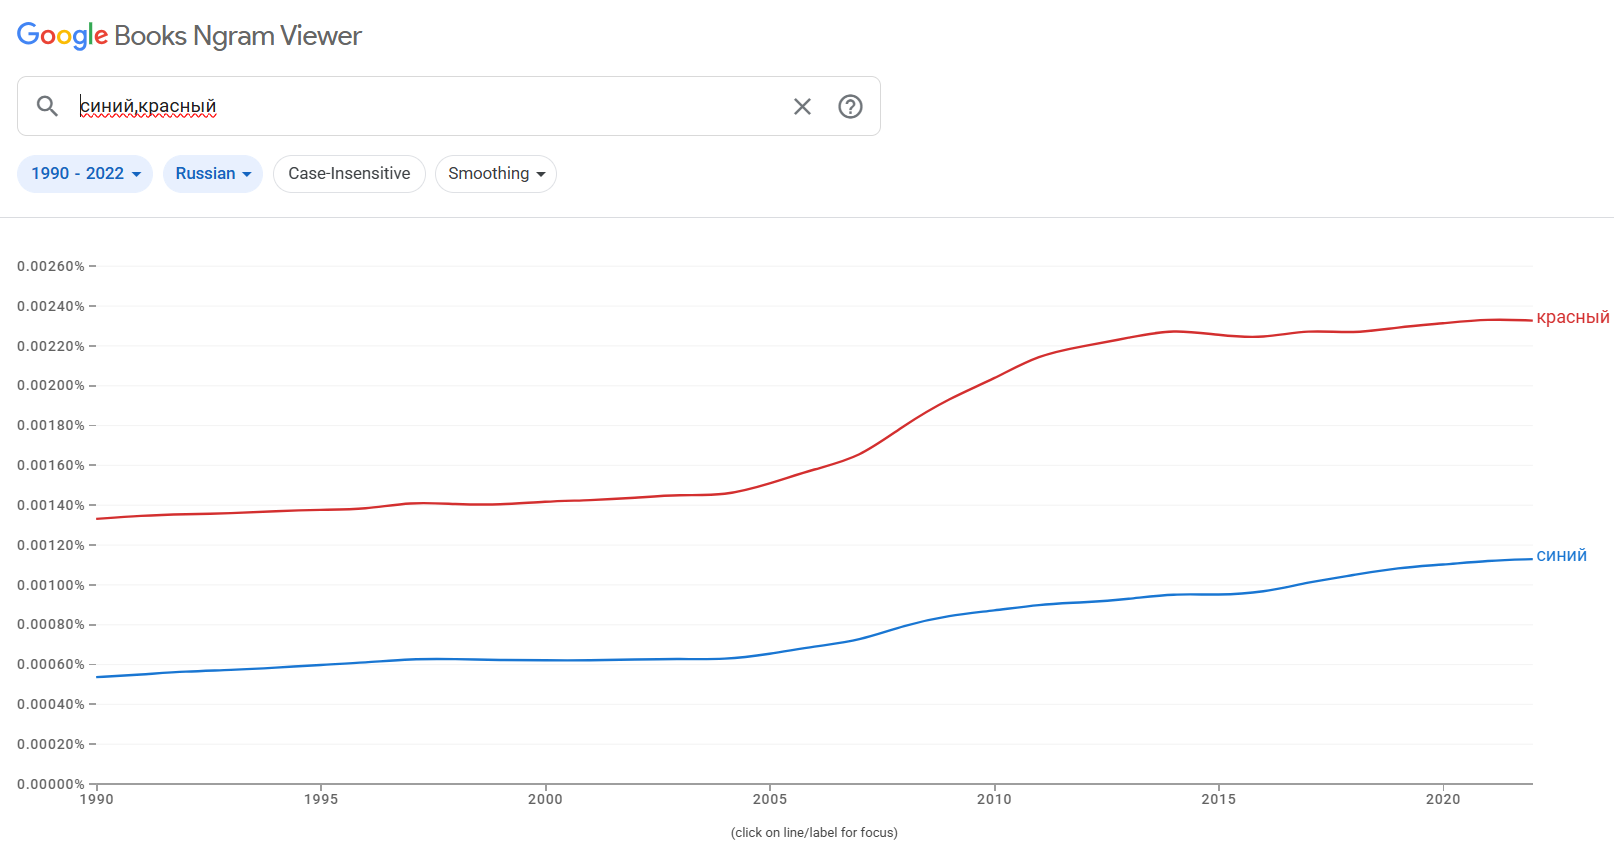

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [6]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [ ]:
#С ПРОДВИНУТЫМ СКОРЕРОМ ПО ФУНКЦИИ ВЫШЕ
def pmi_scorer(word_count_a, word_count_b, bigram_count, total_count, *args): #НОВАЯ ФУНКЦИЯ
    try:
        score = math.log((((bigram_count / total_count) / ((word_count_a / total_count) * (word_count_b / total_count)))), 2)

    except ZeroDivisionError:
        return 0

    return score

def collect_stats(tokenized_sentences):

    unigrams = Counter()
    bigrams = Counter()
    
    for sentence in tokenized_sentences:
        unigrams.update(sentence)                 #СЧИТАЕМ ВСЕ СЛОВА В КОРПУСЕ
        bigrams.update(ngrammer(sentence, 2))     #СЧИТАЕМ ВСЕ БИГРАММЫ В КОРПУСЕ
    
    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, pmi_scorer, threshold=-100000, min_count=2):

    bigram2score = Counter()
    total_count = sum(unigrams.values())

    for bigram in bigrams:
        word_a, word_b = bigram.split()

        if bigrams[bigram] < min_count:   #ИСКЛЮЧАЕМ РЕДКИЕ БИГРАММЫ
            continue

        score = pmi_scorer(unigrams[word_a], unigrams[word_b], bigrams[bigram], total_count)
        
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

unigrams, bigrams = collect_stats(tokenized_sentences)

results = score_bigrams(unigrams, bigrams, pmi_scorer)

results.most_common(10)

[('5-процентного барьера', 19.510568127854185),
 ('соломбальского лдк', 19.510568127854185),
 ('шарм аш-шейхе', 19.510568127854185),
 ('селин дион', 19.510568127854185),
 ('роном хаббардом', 19.510568127854185),
 ('doo wop', 19.510568127854185),
 ('vida loca', 19.510568127854185),
 ('korn freak', 19.510568127854185),
 ('костас симитис', 19.510568127854185),
 ('нажмите снимок', 19.510568127854185)]

In [35]:
#С ОБЫЧНЫМ СКОРЕРОМ
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

def collect_stats(tokenized_sentences):

    unigrams = Counter()
    bigrams = Counter()
    
    for sentence in tokenized_sentences:
        unigrams.update(sentence)                 #СЧИТАЕМ ВСЕ СЛОВА В КОРПУСЕ
        bigrams.update(ngrammer(sentence, 2))     #СЧИТАЕМ ВСЕ БИГРАММЫ В КОРПУСЕ
    
    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, scorer_simple, threshold=-100000, min_count=2):

    bigram2score = Counter()
    total_count = sum(unigrams.values())

    for bigram in bigrams:
        word_a, word_b = bigram.split()

        if bigrams[bigram] < min_count:   #ИСКЛЮЧАЕМ РЕДКИЕ БИГРАММЫ
            continue

        score = scorer_simple(unigrams[word_a], unigrams[word_b], bigrams[bigram], total_count)
        
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

unigrams, bigrams = collect_stats(tokenized_sentences)

results = score_bigrams(unigrams, bigrams, scorer_simple)

results.most_common(10)

[('5-процентного барьера', 0.5),
 ('анарбека шамкеева', 0.5),
 ('соломбальского лдк', 0.5),
 ('della sera', 0.5),
 ('шарм аш-шейхе', 0.5),
 ('сельскому хозяйству', 0.5),
 ('селин дион', 0.5),
 ('карловы вары', 0.5),
 ('роном хаббардом', 0.5),
 ('doo wop', 0.5)]

Результаты разительно отличаются, совпадает лишь пара пунктов биграмм.

Обычный скорер не учитывает частоту слов в корпусе, поэтому просто выдаёт отношение биграмм к количеству входящих слов.
В свою очередь продвинутый скорер рассчитывает, как часто слова встречаются по отдельности и в паре.
По сути первая формула не рассчитывает полноценный pmi.

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [ ]:
def pmi_scorer(word_count_a, word_count_b, bigram_count, total_count, *args): #НОВАЯ ФУНКЦИЯ
    try:
        score = math.log((bigram_count / total_count), 2) - math.log((word_count_a / total_count), 2) - math.log((word_count_b / total_count), 2)

    except ZeroDivisionError:
        return 0

    return score

#если вставить оценку биграммов, то выдаёт тот же результат, так что всё верно

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы